In [1]:
import numpy as np
import pandas as pd

from PIL import Image

from wordcloud import WordCloud, STOPWORDS

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# pip install wordcloud
# jalankan pip install wordcloud jika ada error tidak menemukan package wordcloud

In [3]:
# data alive novel dari https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_novel.txt
alice_novel = open('dataset/alice_novel.txt', 'r').read()

In [4]:
print(len(alice_novel))

145190


In [5]:
wc = WordCloud()
wc.generate(alice_novel)

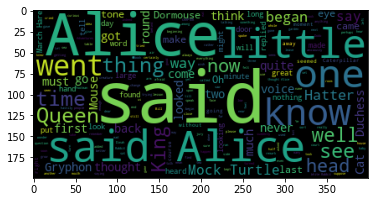

In [6]:
# wordcloud sudah jadi tapi tidak terlihat
# kita gunakan pyplot untuk show image wordcloud nya
plt.imshow(wc)

(-0.5, 399.5, 199.5, -0.5)

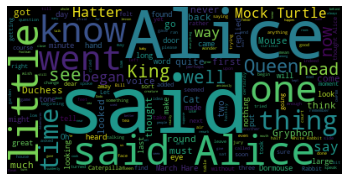

In [7]:
# percantik wordcloud nya
wc = WordCloud()
wc.generate(alice_novel)
plt.imshow(wc)

# axis 0-175 dan 0-350 y-axis dan x-axis kita hapus
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

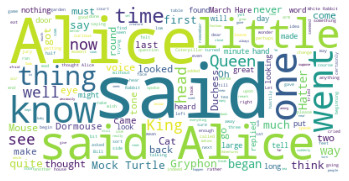

In [8]:
# percantik wordcloud nya
wc = WordCloud(background_color="white")
wc.generate(alice_novel)
plt.imshow(wc)

# axis 0-175 dan 0-350 y-axis dan x-axis kita hapus
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

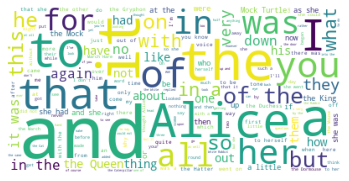

In [9]:
# beberapa kata filler seperti "said" artinya "berkata" mau kita exclude
# kita buat STOPWORDS

wc = WordCloud(background_color="white",
                stopwords=["said"])
wc.generate(alice_novel)
plt.imshow(wc)

# axis 0-175 dan 0-350 y-axis dan x-axis kita hapus
plt.axis('off')

In [10]:
# tapi kok masih banyak kata-kata tidak ada arti lainnya seperti
# and "dan", the, was, a, but, it, of
# kata2 penyambung tidak mau kita include di word cloud

print(STOPWORDS)

# kata2 yang biasanya tidak berguna sudah dikumpulkan di STOPWORDS package wordcloud
# kita bisa pakai

{'could', 'more', 'them', 'its', "doesn't", 'few', "they'd", 'from', "he'll", 'or', 'themselves', 'so', 'would', "you'd", 'him', 'has', 'having', "couldn't", 'therefore', 'http', 'most', 'her', 'we', "they'll", "he'd", 'why', 'out', "she's", "i'm", 'with', 'on', 'am', 'between', 'com', 'ever', 'just', 'same', 'she', 'www', 'below', "what's", 'i', 'both', "you'll", 'my', "there's", 'as', 'each', 'those', 'herself', 'but', 'while', 'his', 'like', 'cannot', 'have', 'this', "hadn't", 'only', 'what', 'above', "let's", "can't", "when's", 'does', "haven't", 'they', 'about', "who's", 'further', 'by', "weren't", 'no', 'are', 'did', 'otherwise', "you've", 'yours', 'k', 'here', "we'll", 'a', 'whom', 'had', "didn't", 'also', "don't", 'down', "that's", 'not', 'since', 'under', 'who', "wouldn't", 'against', 'for', 'up', 'yourself', 'however', 'being', 'these', "how's", "where's", 'itself', 'ours', "won't", "i've", 'himself', 'r', 'hence', 'shall', 'he', 'there', "we've", 'own', 'were', "shouldn't", 

(-0.5, 399.5, 199.5, -0.5)

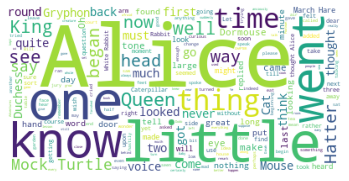

In [11]:
# stopwords nya aku mau pakai yang dia kasih + kata "said"
st = list(STOPWORDS)
st.append("said")

wc = WordCloud(background_color="white",
                stopwords=st)
wc.generate(alice_novel)
plt.imshow(wc)

# axis 0-175 dan 0-350 y-axis dan x-axis kita hapus
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

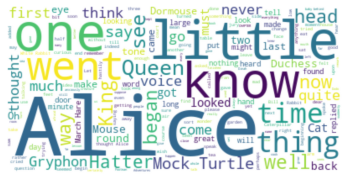

In [12]:
# stopwords nya aku mau pakai yang dia kasih + kata "said"
st = list(STOPWORDS)
st.append("said")

wc = WordCloud(background_color="white",
                stopwords=st)
wc.generate(alice_novel)

# tambahan opsi interpolation untuk menghaluskan gambar
plt.imshow(wc, interpolation="gaussian")

# axis 0-175 dan 0-350 y-axis dan x-axis kita hapus
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

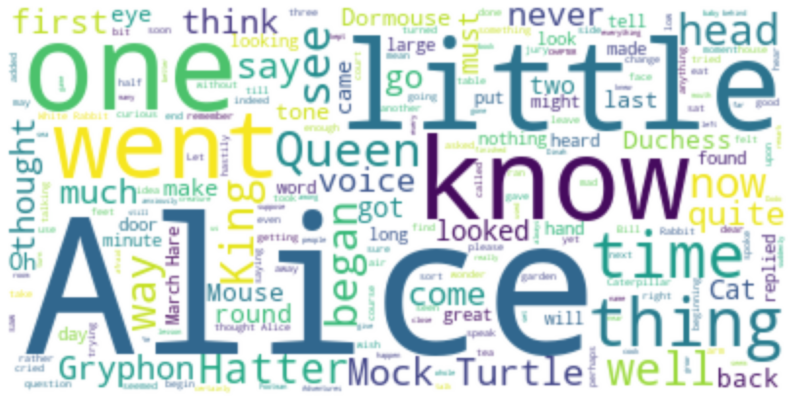

In [13]:
# gunakan figure dari matplotlib untuk mengatur ukuran plot
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(wc, interpolation="gaussian")
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

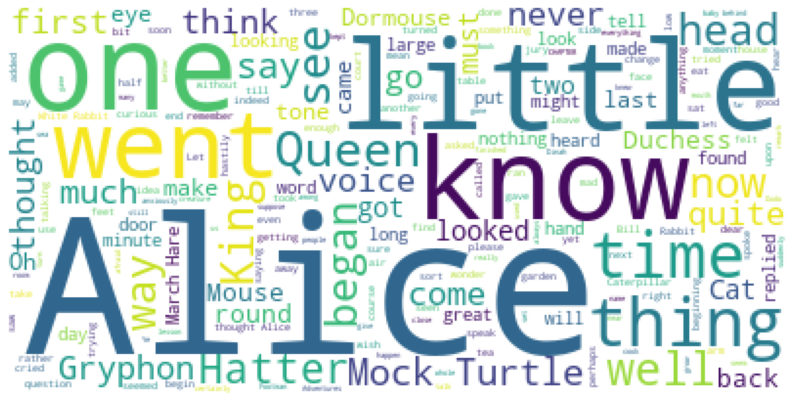

In [14]:
# tanpa interpolation

fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(wc)
plt.axis('off')

In [15]:
# kita bisa gunakan mask untuk membuat bentuk wordcloud yang berbeda
# import gambar ke python lalu convert jadi numpy array
# * setiap pixel gambarnya menjadi 1 angka di numpy array ini
mask_image = np.array(Image.open('dataset/alice_mask.png'))
# mask_image

(-0.5, 899.5, 899.5, -0.5)

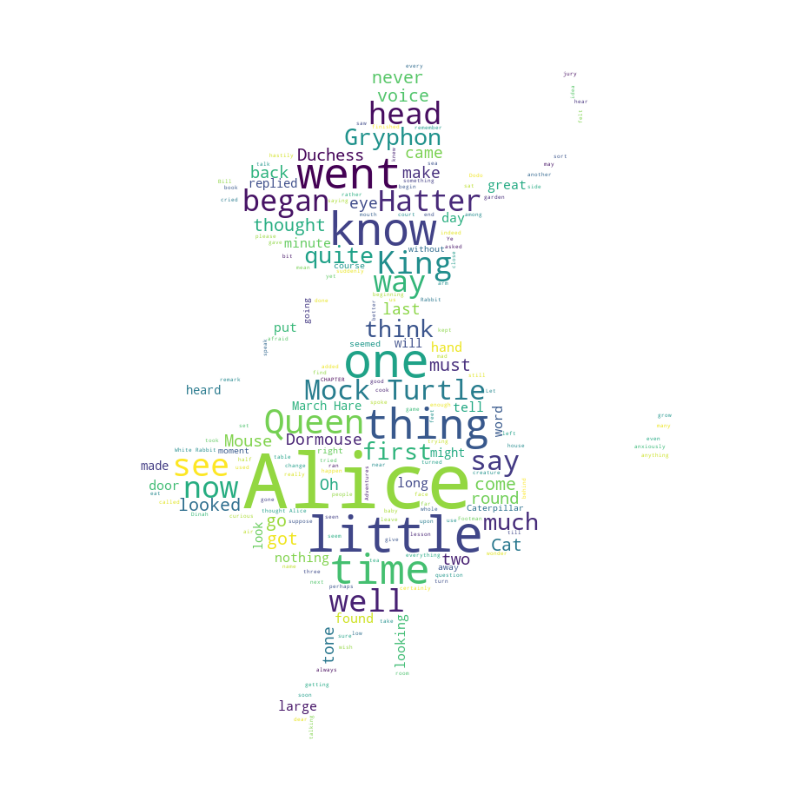

In [16]:
st = list(STOPWORDS)
st.append("said")

# tambah opsi mask lalu kasih gambar nya
wc = WordCloud(background_color="white",
                stopwords=st,
                mask=mask_image)
wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(wc)
plt.axis('off')



(-0.5, 899.5, 899.5, -0.5)

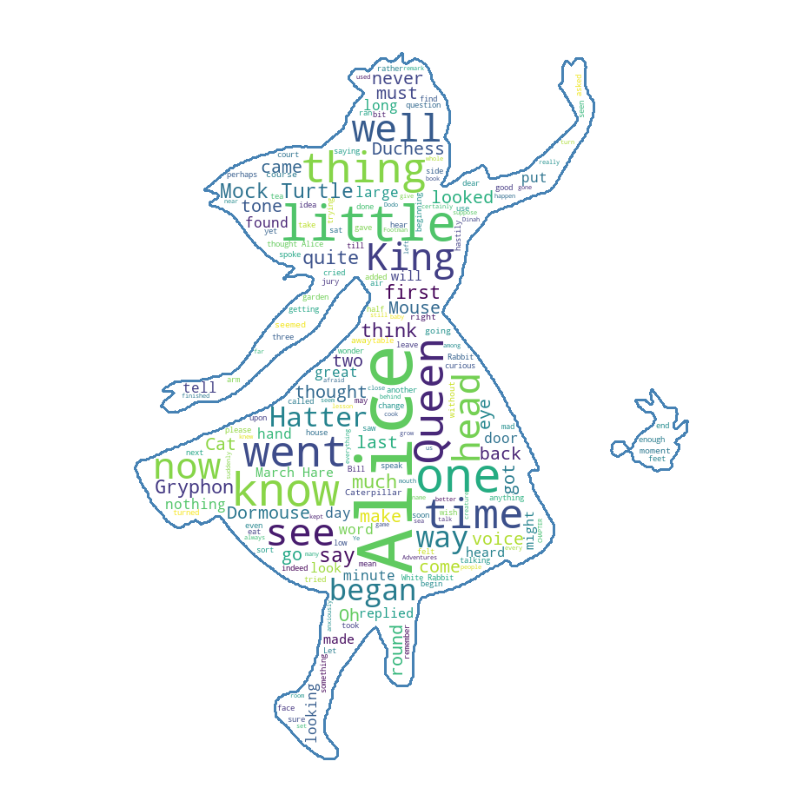

In [17]:
# mau tambah border di gambar mask nya
st = list(STOPWORDS)
st.append("said")

wc = WordCloud(background_color="white",
                stopwords=st,
                mask=mask_image,
                contour_width=3,            # ketebalan border
                contour_color='steelblue')  # warna border
wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(wc)
plt.axis('off')

In [18]:
# kita akan coba buat wordcloud dari data imigrasi ke Canada

df_can = pd.read_excel("dataset/Canada.xlsx", 
                        sheet_name="Canada by Citizenship",
                        skiprows=20,
                        skipfooter=2)

df = df_can.rename(columns={"OdName":"Country", "AreaName":"Area", "RegName":"Region", "DevName":"Dev"})
df = df.drop(columns=['Type', 'Coverage', 'AREA', 'REG', 'DEV'])
df = df.set_index("Country")

display(df)

years = range(2008,2014)

,Area,Region,Dev,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,2741,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,7,...,124,161,140,122,133,128,211,160,174,217


In [19]:
# buat total imigran per negara dulu
df["total"] = df.sum(axis=1)
df.head()

C:\Users\stefa\AppData\Local\Temp\ipykernel_3976\3645393537.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df["total"] = df.sum(axis=1)


,Area,Region,Dev,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [20]:
total_immigrants = df["total"].sum()
total_immigrants

6409153

In [21]:
# data kita convert dari angka jadi words, jadi kata kata
# misal: untuk setiap 1 imigran kita munculkan nama negaranya 1 kali
imigrasi_canada = ""

max_words = 2000

for country in df.index:
    country_name = "".join(country.split())
    country_name = "".join(country_name.split("("))
    country_name = "".join(country_name.split(")"))
    country_name = "".join(country_name.split("-"))
    country_name = "".join(country_name.split(","))
    country_name = "".join(country_name.split("'"))
    # print(country_name, df.loc[country, "total"])

    # imigrasi_canada = imigrasi_canada + ((country_name + " ") * df.loc[country, "total"])

    no_of_words = df.loc[country, "total"] / total_immigrants * max_words
    imigrasi_canada = imigrasi_canada + ((country_name + " ") * int(no_of_words))


print(imigrasi_canada)

Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Albania Albania Albania Albania Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Argentina Argentina Argentina Argentina Argentina Argentina Armenia Australia Australia Australia Australia Australia Australia Australia Austria Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Barbados Barbados Belarus Belarus Belgium Belgium Belgium Bhutan BoliviaPlurinationalStateof BosniaandHerzegovina BosniaandHerzegovina BosniaandHerzegovina BosniaandHerzegovina BosniaandHerzegovina BosniaandHerzegovina

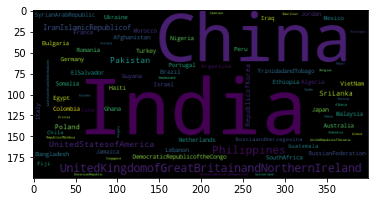

In [22]:
wc_canada = WordCloud(collocations=False)
wc_canada.generate(imigrasi_canada)

plt.imshow(wc_canada)

(-0.5, 399.5, 199.5, -0.5)

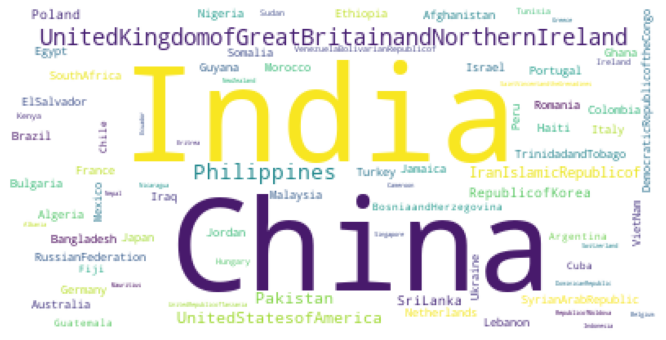

In [23]:
wc_canada = WordCloud(collocations=False, 
                        background_color="white")
wc_canada.generate(imigrasi_canada)

fig = plt.figure()
fig.set_figwidth(12) # set width
fig.set_figheight(6) # set height

plt.imshow(wc_canada)
plt.axis("off")

(-0.5, 1139.5, 777.5, -0.5)

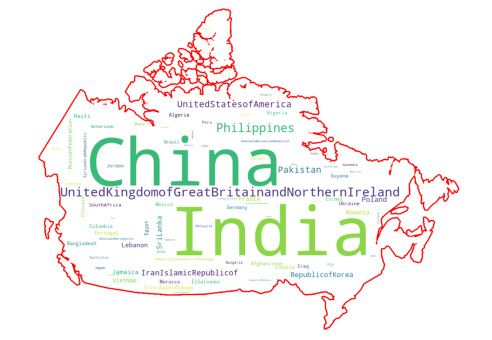

In [29]:
mask_image = np.array(Image.open('dataset/canada_mask.png'))
# plt.imshow(mask_image)

wc_canada = WordCloud(collocations=False, 
                        background_color="white",
                        mask = mask_image,
                        contour_width=3,
                        contour_color='red')
wc_canada.generate(imigrasi_canada)

fig = plt.figure()
fig.set_figwidth(12) # set width
fig.set_figheight(6) # set height

plt.imshow(wc_canada)
plt.axis("off")